# LeNet-5


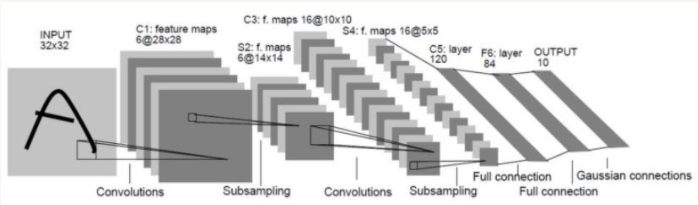

## LeNet-5의 구조
input - C1 - S2 - C3 - S4 - C5 - F6 - output

- input layer
- conv layer(c1, c3, c5)
- subsampling layer(s2, s4)
- full-connected(f6)
- output layer

c1~f6 layer의 활성화 함수 tanh 사용

### C1 layer
인풋 32x32 입력 영상을 6개의 5x5 필터와 컨볼루션 연산. -> 6장의 28x28 피쳐맵을 얻는다

각 필터마다 특성맵을 얻기 때문에 6장의 특성맵이 나오고, 패딩이 없기 때문에(밸리드패딩) 사이즈는 28로 줄어듦

- 파라미터 156

### S2 layer
c1 layer에서 얻은 6장의 28x28 특성맵을 average pooling을 사용해 subsampling을 함 2x2 필터를 stride 2 설정해 특성맵이 14x14(절반 사이즈)로 줄어들게 함

- 파라미터 12

### C3 layer
6장의 14x14 피쳐맵으로부터 16장의 10x10 특성맵을 산출해냄

6개의 모든 피처맵을 16개의 필터처리하는것이 아니라 다음 테이블처럼 선택적으로 입력 영상을 선택해 반영한다

이유는 연산량을 줄이고, 연결의 대칭을 깨줘서 처음 convolution으로 얻은 6개의 로우레벨피처가 서로 다른 조합으로 섞여 global feature로 나타나게 하기 위해서이다

아래표의 1열의 값들 0-5는 S2 layer의 피쳐맵들이고 1행의 0-15는 16장의 필터를 뜻한다

연속된 3장씩 모아서 6장의 피쳐맵 산출, 연속된 4장씩 모아서 6장 피쳐맵 산출, 불연속한 4장씩 모아서 3장의 특성맵 산출, 마지막으로 6장 모두 가지고 1장의 특성맵 산출 -> 16장

- 파라미터 1516

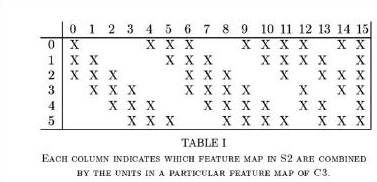

### S4 layer
S2와 마찬가지로 subsampling 단계이고, 16장의 10x10 피쳐맵 영상을 16장의 5x5 영상으로 만든다
- 파라미터 32

###C5 layer
16개의 5x5 영상을 받아 120개의 5x5 필터와 convolution을 수행하여 출력은 120개의 1x1크기의 피쳐맵이 됨
- 파라미터 48120

이것들을 fully connected 형태로 연결해 총 120개의 피쳐맵 생성함 이전단계의 16개의 피쳐맵이 다시 전체적으로 섞이는 결과를 냄

### F6 layer
fully connected, c5의 결과를 84개의 유닛에 연결시킴
- 파라미터 10164

### output layer

10개의 RBF 유닛들로 구성됨. 각각 F6의 84개의 유닛으로부터 인풋을 받아 최종적으로 이미지가 속한 클래스를 알려줌


- lenet5를 제대로 가동하기 위해 훈련할 파라미터는 총 60000개임

1. input 값은 numpy을 이용하여 random으로 입력 값 맞춰서 작성해주기 (보통 학습 전에 넣는 입력 값은 (배치사이즈, 이미지 높이, 이미지 너비, 채널의 수) 로 많이 구성되어있어! LeNet에서는 32x32를 쓰니까 우선 batch size는 1이라하고, 채널의 수는 3이라고 쳐서 (1, 32, 32, 3)으로 random 한 값을 받아오면 될것같아!
2. Conv2D, MaxPool2D, Dense 등 순서에 맞춰서 적어주고, 파라미터는 LeNet의 모델에 맞게 선정!
3. 한번 돌리고 shape 출력하고 한번돌리고 shape 출력하고 이런 파라미터를 썼을때는 shape이 이렇게 변하는구나, Conv2D를 쓰면 이렇게 되는구나 같은 전체적인 흐름을 이해하는게 좋앙

(심화) 만약에 모델을 다 만들었으면, keras.datasets에서 제공해주는 mnist을 적용해보기

```data load 하는 코드
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
```

(심화2) 적용까지 완료했으면 옵티마이저와 로스를 설정해주고 실제로 모델 학습해보기
[ 학습할땐 train_x, train_y 만 사용]

(심화3) 학습한 모델의 성능을 확인하기 위해 evaluate 해주기
[ 평가할땐 test_x, test_y 사용]

(심화4) 정확도 및 loss 그래프로 나타내기!



In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
import tensorflow as tf

In [32]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [33]:
train_x.shape

(60000, 28, 28)

In [34]:
train_y.shape

(60000,)

In [35]:
train_x=train_x/255
test_x=test_x/255
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [36]:
train_x.shape

(60000, 28, 28, 1)

In [37]:

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [38]:

train_y.shape

(60000, 10)

In [46]:
model = tf.keras.Sequential() 
model.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(5,5),padding='same', activation='tanh', filters=6)) 
model.add(AveragePooling2D(pool_size=2, strides=2)) 
model.add(Conv2D(kernel_size=(5, 5), filters=16, padding='valid', activation='tanh')) 
model.add(AveragePooling2D(pool_size=2, strides=2)) 
model.add(Conv2D(kernel_size=(5, 5), filters=120)) 
model.add(Flatten()) 
model.add(Dense(units=84, activation='tanh')) 
model.add(Dense(units=10, activation='softmax'))



In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(train_x, train_y, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 30s 64ms/step - loss: 0.2157 - accuracy: 0.9354
Epoch 2/10
469/469 [==============================] - 30s 64ms/step - loss: 0.1301 - accuracy: 0.9614
Epoch 3/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0917 - accuracy: 0.9720
Epoch 4/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0695 - accuracy: 0.9786
Epoch 5/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0578 - accuracy: 0.9822
Epoch 6/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0484 - accuracy: 0.9848
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0416 - accuracy: 0.9876
Epoch 8/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0370 - accuracy: 0.9883
Epoch 9/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 10/10
469/469 [==============================] - 31s 65ms/step - loss: 0.030

In [52]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 3s 10ms/step - loss: 0.0383 - accuracy: 0.9868


[0.03825809806585312, 0.9868000149726868]

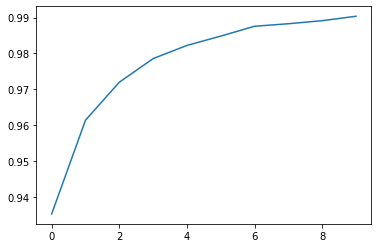

In [53]:
plt.plot(history.history['accuracy'])

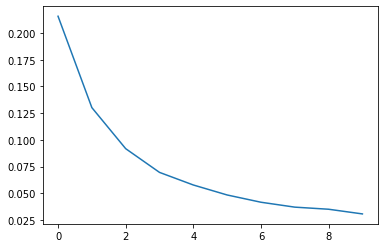

In [54]:
plt.plot(history.history['loss'])